In [ ]:
!pip install scikit-fuzzy
#!pip install cupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=f7f8f3d64ba033906b86a85bd108d3fb990bf0581212ac3b39131939426da416
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
import cv2
import matplotlib.pyplot as plt
#import numpy as np 
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from skimage.io import imsave
from google.colab.patches import cv2_imshow
from PIL import Image, ImageOps
from matplotlib import cm
from PIL import ImageFilter 
import matplotlib.image as mpimg
from PIL import Image as im
import cv2
from IPython.display import display
%matplotlib inline

In [ ]:
# !find / -iname 'libdevice'
# !find / -iname 'libnvvm.so'


In [ ]:
import os
os.environ['NUMBAPRO_LIBDEVICE'] = "/usr/local/cuda-11.8/nvvm/libdevice"
os.environ['NUMBAPRO_NVVM'] = "/usr/local/cuda-11.8/nvvm/lib64/libnvvm.so"

In [ ]:
!unzip CIN.zip
!unzip Normal.zip

In [ ]:
#plt.imshow(b_channel_masked)

In [ ]:
# a=img*0
# #a=a+128
# #plt.imshow(a)
# lcd=cv2.cvtColor(a, cv2.COLOR_BGR2YCrCb)
# l,c,d=cv2.split(lcd)
# plt.imshow(c)

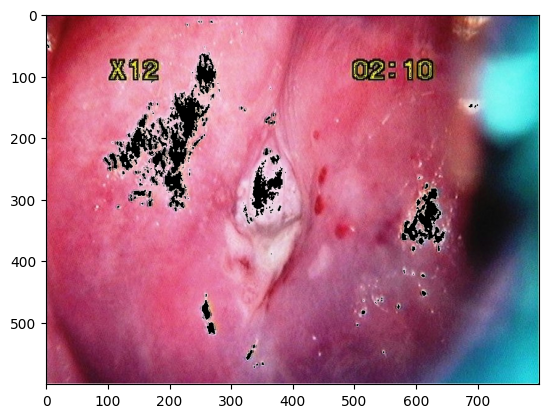

In [ ]:
import cv2
from IPython.display import display
import numpy as nmp
path='CIN'
cl='Atlas_36.2.jpg'
# path='Normal'
# cl='Atlast_14.1.jpg'
img= cv2.imread(f'{path}/{cl}')
B,G,R=cv2.split(img)
#lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
delta=128
B=nmp.array(B)
G=nmp.array(G)
R=nmp.array(R)
l_channel=nmp.array(0.299*R+0.587*G+0.114*B)
a_channel=nmp.array((R-l_channel)*0.703 + delta)
b_channel=nmp.array((B-l_channel)*0.524 + delta)
# # Extract the luminance and chrominance components
#l_channel, a_channel, b_channel = cv2.split(lab_img)

# Threshold the luminance channel to identify glare regions
thres_value = 230  # threshold value for glare detection
glare_mask = nmp.array(l_channel > thres_value)

# Estimate the color of the underlying pixels using the chrominance channels
a_channel_masked = nmp.where(glare_mask, 128, a_channel)
b_channel_masked = nmp.where(glare_mask, 128, b_channel)
l_channel_masked = nmp.where(glare_mask, 0, l_channel)
a_channel_masked=a_channel_masked.astype(nmp.uint8)
b_channel_masked=b_channel_masked.astype(nmp.uint8)
l_channel_masked=l_channel_masked.astype(nmp.uint8)
# Merge the masked chrominance channels with the original luminance channel
lab_img_masked = cv2.merge([l_channel_masked, a_channel_masked, b_channel_masked])

# Convert the masked image back to BGR color space
img_masked = cv2.cvtColor(lab_img_masked, cv2.COLOR_YCrCb2RGB)
gray=cv2.cvtColor(img_masked, cv2.COLOR_RGB2GRAY)
plt.imshow(img_masked)

In [ ]:
37*7*7/3600

0.5036111111111111

In [ ]:
def calculate_scores(U,centers,m=2):
    n=U.shape[1]
    c=U.shape[0]
    #--------------SSE---------------------------------
    #SSE = np.sum((U ** m) *np.square(image_data.reshape(-1, 1) - centers[U.argmax(axis=0)].T), axis=0).sum()
    #----------------Xi-Beni----------------------------
    #wss = np.sum((U ** 2) *np.square(image_data.reshape(-1, 1) - center[U.argmax(axis=0)].T), axis=0).sum()
    #bss = np.sum(np.square(center[:, np.newaxis] -center[np.newaxis, :]), axis=(0, 2)).sum()
    #xbi = (wss / bss) * ((n - c) / c)
    #-------------------NFPC---------------------------------
    nfpc = np.sum(np.square(U)) / (n * c)
    #

    #--------------Partition coefficient--------------
    vpc=np.sum(np.square(U))/n

    #----------------Partition entropy----------------
    vpe=-np.sum(U*np.log(U))/n
    mvpc=1-(c*(1-vpc)/(1-c))
    return vpc

In [ ]:
centers[U.argmax(axis=0)].T.shape

(3, 480000)

In [ ]:
labels.shape

(600, 800)

In [ ]:
%%time
#import time
import numpy as nmp
#path='Normal'
paths=['Normal','CIN']
paths=paths[0:1]
import os
#['Atlas_36.2.jpg']#
#mylist=mylist[0:1]
final_scores=[]#np.zeros((1,1))
for path in paths:
  mylist=os.listdir(path)
  mylist=mylist[1:2]
  for cl in mylist:
    img= cv2.imread(f'{path}/{cl}')
    temp=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    B,G,R=cv2.split(img)
    delta=128
    l_channel=0.299*R+0.587*G+0.114*B
    a_channel=(R-l_channel)*0.703 + delta
    b_channel=(B-l_channel)*0.524 + delta
    thres_value = 230  
    glare_mask = l_channel > thres_value
    a_channel_masked = nmp.where(glare_mask, 128, a_channel)
    b_channel_masked = nmp.where(glare_mask, 128, b_channel)
    l_channel_masked = nmp.where(glare_mask, 0, l_channel)
    a_channel_masked=a_channel_masked.astype(np.uint8)
    b_channel_masked=b_channel_masked.astype(np.uint8)
    l_channel_masked=l_channel_masked.astype(np.uint8)

    lab_img_masked = cv2.merge([l_channel_masked, a_channel_masked, b_channel_masked])
    img_masked = cv2.cvtColor(lab_img_masked, cv2.COLOR_YCrCb2RGB)
    img_masked=np.array(img_masked)  
    nclusters=[3,4,5,6,7,8,9]
    scores=[]
    for n in nclusters:
      centers, U, T, obj_fcn=pfcm(img_masked.reshape(img_masked.shape[0]*img_masked.shape[1], img_masked.shape[2]),c=n)
      labels = np.argmax(U, axis=0).reshape(img_masked.shape[0], img_masked.shape[1]) # assing each pixel to its closest cluster
      #img = np.zeros(shape=(labels.shape[0], labels.shape[1], 3))
      #n1 = U.shape[1]
      #fpc=np.trace(np.dot(U,U.T)) / float(n1)
      #scores.append(nmp.atleast_1d(np.asnumpy(fpc))[0])
      scores.append(nmp.atleast_1d(np.asnumpy(calculate_scores(U,centers)))[0])
      img=centers[labels]
      if(img.max() > 1):
          img /= 255
    # plt.figure()
    # plt.imshow(temp)
    # plt.figure()
    # plt.imshow(np.asnumpy(img))
    diffs = np.diff(scores, 2)
    final_scores.append(nclusters[nmp.argmax(np.asnumpy(diffs)) + 2])

CPU times: user 46.7 s, sys: 63.2 ms, total: 46.8 s
Wall time: 48 s


In [ ]:
final_scores

[9]

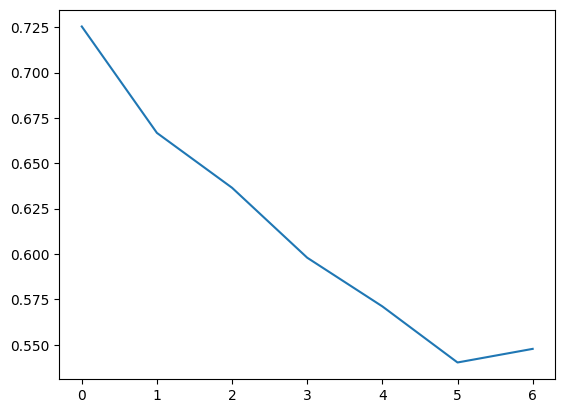

In [ ]:
plt.plot(scores)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from kneed import KneeLocator
kneedle = KneeLocator(nclusters, scores, curve='convex', direction='decreasing')
elbow_point = kneedle.knee

In [ ]:
np.diff(scores, 2)

array([ 0.00694735,  0.02499751, -0.02623371, -0.00418199,  0.03529969])

In [ ]:

range(3,10)

range(3, 10)

In [ ]:
scores

[1.4396931295668824,
 1.4426626137449814,
 1.4554587678036,
 1.445701109552413,
 1.4724142531818183,
 1.4738618824469647,
 1.5001103659417079]

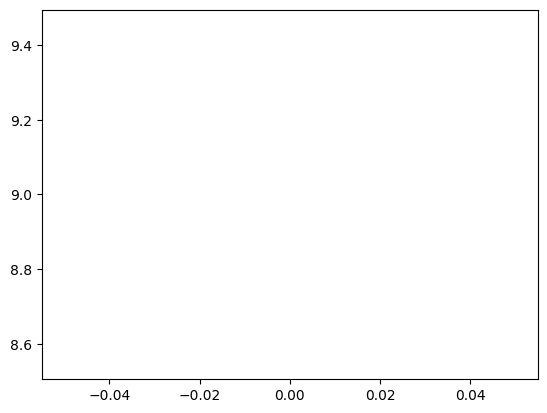

In [ ]:
plt.plot(final_scores)

In [ ]:


# path='CIN'
# cl='Atlas_36.2.jpg'
# path='Normal'
# cl='Atlast_14.1.jpg'
# img= cv2.imread(f'{path}/{cl}')
#img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# B,G,R=cv2.split(img)
# delta=128
# Y=0.95*R+0.03*G+0.04*B
# Cr=(R-Y)*0.703 + delta
# Cb=(B-Y)*0.524 + delta

# R=Y + 1.403*(Cr-delta)
# G=Y-0.714*(Cr-delta)-0.344*(Cb-delta)
# B=Y+1.773*(Cb-delta)
#Y, Cr, Cb = cv2.split(img_ycrcb)
#Y=cv2.bitwise_not(Y)
# img=cv2.merge([Y,Cr, Cb])
# #img=cv2.merge([R,G, B])
# img=img.astype(np.uint8)
# img=cv2.cvtColor(img, cv2.COLOR_YCrCb2RGB)
#img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# kernel_size=9
# sigma=kernel_size*0.3
# blur_image = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)
# max_value = np.max(blur_image)
# norm_img = blur_image.astype(np.float32) / max_value
#img = np.where(img <= 255 - increase, v + increase, )


# hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# h, s, v = cv2.split(hsv)
# value1=35
# value2=230
# v[v >= value2]=255
# v[(v>3*value1) & (v<value2)]-=value1

# if value >= 0:
#     lim = 255 - value
#     v[v > lim] = 255
#     v[v <= lim] += value
# else:
#     value = int(-value)
#     lim = 0 + value
#     v[v < lim] = 0
#     v[v >= lim] -= value

# final_hsv = cv2.merge((h, s, v))
# final_hsv=cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
# display(im.fromarray(img), im.fromarray(final_hsv))
# plt.imshow(img)
# plt.imshow(final_hsv)


SIFCM

In [ ]:
from skimage import data
n_clusters=[7]
scores=[]
for n in n_clusters:
  #img=plt.imread(f'{path}/{cl}')
  #img=norm_img
  #img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  cluster = FCM(gray,n,m=1.2,epsilon=.05,max_iter=100,kernel_shape='uniform',kernel_size=3)
  cluster.form_clusters()
  scores.append(cluster.calculate_scores())
  result=cluster.result
#plt.plot(n_clusters,scores)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8),dpi=100)

ax1=fig.add_subplot(1,2,1)
ax1.imshow(img)
ax1.set_title('image')

ax2=fig.add_subplot(1,2,2)
ax2.imshow(result)
ax2.set_title('segmentation')

plt.show(block=False)

In [ ]:
import numpy as np
from scipy import signal



def getGaussianElement(a,b,stda,stdb,quad=None):


    assert a>0 and int(a)==a, "Major half-axis 'a' needs to be an positive integer."
    assert b>0 and int(b)==b, "Minor half-axis 'b' needs to be an positive integer."
    assert stda>0, "Standard deviation 'stda' needs to be an positive integer."
    assert stdb>0, "Standard deviation 'stdb' needs to be an positive integer."
    assert quad in [None,'ne','nw','sw','se'], "Quadrant should be one in the list [None, 'ne','nw','sw','se']."

    ax=np.arange(-a,a+1)
    bx=np.arange(-b,b+1)
    x,y=np.meshgrid(ax,bx)
    ellipse=0.5*np.pi/stda/stdb*np.exp(-x**2/2./stda**2 - y**2/2./stdb**2)

    if quad is not None:
        if quad=='ne':
            ellipse=np.where((ellipse>0) & (x>=0) & (y>=0),ellipse,0)
        elif quad=='nw':
            ellipse=np.where((ellipse>0) & (x<=0) & (y>=0),ellipse,0)
        elif quad=='sw':
            ellipse=np.where((ellipse>0) & (x<=0) & (y<=0),ellipse,0)
        elif quad=='se':
            ellipse=np.where((ellipse>0) & (x>=0) & (y<=0),ellipse,0)

    #--------------------Normalize--------------------
    ellipse=ellipse/np.max(ellipse)

    return ellipse



class FCM():
    def __init__(self,image,n_clusters,m=2,kernel_size=5,
            kernel_shape='uniform',lam=0.5,epsilon=0.05,max_iter=300):


        #-------------------Check inputs-------------------
        if np.ndim(image) != 2:
            raise Exception("<image> needs to be 2D (gray scale image).")
        if n_clusters <= 0 or n_clusters != int(n_clusters):
            raise Exception("<n_clusters> needs to be positive integer.")
        if m < 1:
            raise Exception("<m> needs to be >= 1.")
        if kernel_size <=0 or kernel_size != int(kernel_size):
            raise Exception("<kernel_size> needs to be positive integer.")
        if kernel_shape not in ['uniform', 'gaussian']:
            raise Exception("<kernel_shape> needs to be one of 'uniform', 'gaussian'.")
        if lam <= 0:
            raise Exception("<lam> needs to be > 0.")
        if epsilon <= 0:
            raise Exception("<epsilon> needs to be > 0")

        self.image = image
        self.n_clusters = n_clusters
        self.m = m
        self.kernel_size = kernel_size
        self.kernel_shape = kernel_shape
        self.lam = lam
        self.epsilon = epsilon
        self.max_iter = max_iter

        self.shape = image.shape
        self.X = image.flatten().astype('float')
        self.numPixels = image.size

        #-----------------Initial weights-----------------
        self.U = np.zeros((self.numPixels, self.n_clusters))
        idx = np.arange(self.numPixels)
        for ii in range(self.n_clusters):
            idxii = idx%self.n_clusters==ii
            self.U[idxii,ii] = 1

        #-----------------Initial centers-----------------
        self.C = np.linspace(np.min(image),np.max(image),n_clusters)
        self.C = self.C.reshape(self.n_clusters,1)

        #---------------Neighbourhood kernel---------------
        if kernel_shape == 'uniform':
            self.kernel = np.ones([kernel_size,kernel_size,1])
        if kernel_shape == 'gaussian':
            radius = max(1,int(kernel_size/.2))
            stdr = max(1,int(radius/.2))
            self.kernel = getGaussianElement(radius,radius,stdr,stdr)

        #----------------Initial hesitation----------------
        self.hesitation = 1.-self.U-(1.-self.U)/(1.+2.*self.U)


    def update_U(self):
        '''Compute weights'''
        c_mesh,x_mesh = np.meshgrid(self.C,self.X)
        power = 2./(self.m-1)
        p1 = abs(x_mesh-c_mesh)**power
        p2 = np.sum((1./abs(x_mesh-c_mesh))**power,axis=1)

        return 1./(p1*p2[:,None])


    def update_C(self):
        '''Compute centroid of clusters'''
        num = np.dot(self.X,self.U**self.m)
        den = np.sum(self.U**self.m,axis=0)

        return num/den


    def calculate_h(self):
        '''Compute neighbourhood weights'''
        kernel = np.ones((5,5,1))
        uu = self.U.reshape((self.shape+(self.n_clusters,)))
        h = signal.fftconvolve(uu,kernel,mode='same')
        h = h.reshape(self.U.shape)

        return h

    def compute_intuitionistic_U(self):
        '''Compute intuitionistic U'''
        self.hesitation=1.-self.U-(1-self.U)/(1+self.lam*self.U)

        return self.U+self.hesitation


    def computeNew_U(self):
        '''Compute new weights after incorporating spatial and intuitionistic'''
        p = 1
        #q = 2
        q = 3
        self.h = self.calculate_h()
        num=self.U**p*self.h**q
        denom=num.sum(axis=1)
        denom=np.outer(denom,1+np.arange(self.n_clusters))

        return num/denom


    def computeIntraDists(self):
        '''Compute mean intra cluster distances'''

        result = self.deFuzzify()
        c_mesh,x_mesh=np.meshgrid(self.C,self.X)
        dist=abs(c_mesh-x_mesh)
        idx=np.arange(self.n_clusters)
        match=result[:,None]-idx[None,:]
        _,count=np.unique(self.result,return_counts=True)
        sigma=(dist*(match==0)).sum(axis=0)/count

        return sigma


    def calculate_DB_score(self):
        '''Compute DB index
        DB = 1/c * \sum_{1}^{c} max_{i != j} ( (s_i + s_j) / d_{i,j} )
        where s_i is the mean distance between centroid i and its members,
        d_{i,j} is the centroid distance btween i and j
        c is the number of clusters
        '''

        sigmas = self.computeIntraDists()

        rs=sigmas[:,None]+sigmas[None,:]
        dists=abs(self.C[:,None]-self.C[None,:])
        np.fill_diagonal(dists,np.nan)
        rs=rs/dists
        ds=np.nanmax(rs,axis=0)
        DB_score=ds.sum()/self.n_clusters

        print("DB_score = %f" %DB_score)
        return DB_score

    def calculate_D_score(self):
        '''Compute Dunn index
        D = min{ min { d_{i,j} / max {s_k} } }
        the ratio of min inter-cluster distance to max  intra-cluster distance
        where s_i is the mean distance between centroid i and its members,
        d_{i,j} is the centroid distance btween i and j
        '''

        sigmas = self.computeIntraDists()

        denom=np.max(sigmas)
        dists=abs(self.C[:,None]-self.C[None,:])/denom
        np.fill_diagonal(dists,np.inf)
        D_score=np.min(dists)

        print("D_score = %f" %D_score)
        return D_score


    def calculate_scores(self):

        #--------------Partition coefficient--------------
        self.vpc=(self.U**2).sum()/self.numPixels
        print("VPC =  %f" %self.vpc)

        #----------------Partition entropy----------------
        vpe=self.U*np.log(self.U)
        self.vpe=-1*vpe.sum()/self.numPixels
        print("VPE = %f" %self.vpe)

        #------------------Cost function------------------
        c_mesh,x_mesh=np.meshgrid(self.C,self.X)
        numer=(self.U*(x_mesh-c_mesh)**2).sum()
        denom=self.numPixels*(self.C[0]-self.C[1])**2
        self.vxb=numer/denom
        print("VXB = %f" %self.vxb)

        #-------------DB scorea nd Dunn index-------------
        self.calculate_DB_score()
        self.calculate_D_score()
        return self.calculate_DB_score()#,D_score


    def form_clusters(self):
        '''Iterative training'''

        d = 100
        if self.max_iter != -1:
            i = 0
            while True:
                self.C = self.update_C()
                old_u = np.copy(self.U)
                self.U = self.update_U()
                self.U = self.compute_intuitionistic_U()
                self.U = self.computeNew_U()
                #d = sum(abs(sum(self.U_new - old_u)))
                # this way of computing d is faster
                d = np.sum(abs(self.U - old_u))
                #print("Iteration %d : cost = %f" %(i, d))

                if d < self.epsilon or i > self.max_iter:
                    break
                i+=1
        else:
            i = 0
            while d > self.epsilon:
                self.update_C()
                old_u = np.copy(self.U)
                self.update_U()
                d = sum(abs(sum(self.U - old_u)))
                self.segmentImage(i)
                i+=1

        self.segmentImage()


    def deFuzzify(self):
        return np.argmax(self.U, axis = 1)


    def segmentImage(self):
        '''Segment image based on max weights'''

        result = self.deFuzzify()
        self.result = result.reshape(self.shape).astype('int')

        return self.result

ENFCM

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

 
def get_mean_image_in_window(image, kernel):
    '''Get image consisting of mean values ​​of neighboring pixels in a window '''    
    neighbor_sum = convolve2d(
        image, kernel, mode='same',
        boundary='fill', fillvalue=0)

    num_neighbor = convolve2d(
        np.ones(image.shape), kernel, mode='same',
        boundary='fill', fillvalue=0)

    return neighbor_sum / num_neighbor     
   
    

class EnFCM():
    def __init__(self, image, image_bit, n_clusters, m, neighbour_effect, epsilon, max_iter, kernel_size):
        '''Modified Fuzzy C-means clustering
        <image>: 2D array, grey scale image.
        <n_clusters>: int, number of clusters/segments to create.
        <m>: float > 1, fuzziness parameter. A large <m> results in smaller
             membership values and fuzzier clusters. Commonly set to 2.
        <kernel_size>: int >= 1, size of neighborhood.
        <neighbour_effect>: float, parameter which controls the influence extent of neighbouring pixels.
        <max_iter>: int, max number of iterations.
        '''

        #-------------------Check inputs-------------------
        if np.ndim(image) != 2:
            raise Exception("<image> needs to be 2D (gray scale image).")
        if n_clusters <= 0 or n_clusters != int(n_clusters):
            raise Exception("<n_clusters> needs to be positive integer.")
        if m < 1:
            raise Exception("<m> needs to be >= 1.")
        if kernel_size <=0 or kernel_size != int(kernel_size):
            raise Exception("<kernel_size> needs to be positive integer.")
        if epsilon <= 0:
            raise Exception("<epsilon> needs to be > 0")

        self.image = image
        self.image_bit = image_bit
        self.n_clusters = n_clusters
        self.m = m
        self.neighbour_effect = neighbour_effect
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.kernel_size = kernel_size

        self.shape = image.shape # image shape
        self.X = image.flatten().astype('float') # flatted image shape: (number of pixels,1) 
        self.numPixels = image.size
       
    #--------------------------------------------- 
    def initial_U(self):
        U=np.zeros((self.num_gray, self.n_clusters))
        idx = np.arange(self.num_gray)
        for ii in range(self.n_clusters):
            idxii = idx%self.n_clusters==ii
            U[idxii,ii] = 1        
        return U
    
    def update_U(self):
        '''Compute weights'''
        idx = np.arange(self.num_gray)
        c_mesh,idx_mesh = np.meshgrid(self.C,idx)
        power = -2./(self.m-1)
        numerator = abs(idx_mesh-c_mesh)**power
        denominator = np.sum(abs(idx_mesh-c_mesh)**power,axis=1)
        return numerator/denominator[:,None]

    def update_C(self):
        '''Compute centroid of clusters'''
        idx = np.arange(self.num_gray)
        idx_reshape = idx.reshape(len(idx),1)
        numerator = np.sum(self.histogram*idx_reshape*pow(self.U,self.m),axis=0)
        denominator = np.sum(self.histogram*pow(self.U,self.m),axis=0)
        return numerator/denominator
   
    #---------------------------------------------     
    def get_filtered_image(self):
        
         # Create padding image
        print("Getting filtered image..") 
        
        # mask to ignore the center pixel
        mask = np.ones((self.kernel_size,self.kernel_size))
        mask[int(self.kernel_size/2),int(self.kernel_size/2)]=0
        
        a = self.neighbour_effect # alpha
        mean_image = get_mean_image_in_window(self.image, mask)
        # median_image = ndimage.generic_filter(self.image, np.nanmean, footprint=mask, mode='constant', cval=np.NaN) # too slow
        filtered_image = (self.image+a*mean_image)/(1+a) # linearly-weighted sum image
        dtype = self.image.dtype
        self.filtered_image = filtered_image.reshape(self.shape).astype(dtype)
    
    def calculate_histogram(self):        
        hist_max_value = (1 << self.image_bit)
        hist = cv2.calcHist([self.filtered_image],[0],None,[hist_max_value],[0,hist_max_value])
        self.num_gray = len(hist)
        self.histogram = hist
                       
    def form_clusters(self):
        self.get_filtered_image() 
        self.calculate_histogram()
        
        '''Iterative training'''        
        d = 100
        self.U = self.initial_U()
        if self.max_iter != -1:
            i = 0
            while True:             
                self.C = self.update_C()
                old_u = np.copy(self.U)
                self.U = self.update_U()
                d = np.sum(abs(self.U - old_u))
                print("Iteration %d : cost = %f" %(i, d))

                if d < self.epsilon or i > self.max_iter:
                    break
                i+=1
        else:
            i = 0
            while d > self.epsilon:
                self.C = self.update_C()
                old_u = np.copy(self.U)
                self.U = self.update_U()
                d = np.sum(abs(self.U - old_u))
                print("Iteration %d : cost = %f" %(i, d))

                if d < self.epsilon or i > self.max_iter:
                    break
                i+=1
        self.segmentImage()


    def deFuzzify(self):
        return np.argmax(self.U, axis = 1)

    def segmentImage(self):
        '''Segment image based on max weights'''

        result = self.deFuzzify()
        
        self.result = np.array(self.image, copy=True)
        for i in range(len(result)):
            self.result[self.result==i]=result[i]
            
        self.result = self.result.reshape(self.shape).astype('int')

        return self.result

In [ ]:
img=norm_img
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cluster = EnFCM(img, image_bit=8, n_clusters=7, m=1.7,  epsilon=0.05, max_iter=500,neighbour_effect=3, kernel_size=5)
cluster.form_clusters()
result=cluster.result

fig=plt.figure(figsize=(12,8),dpi=100)
ax1=fig.add_subplot(1,2,1)
ax1.imshow(img,cmap='gray')
ax1.set_title('image')
ax2=fig.add_subplot(1,2,2)
ax2.imshow(result)
ax2.set_title('segmentation')
plt.show(block=False)
plt.close()

MFCM

In [ ]:
import sys
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import time

def make_spatial_distance_window(windowSize, center_coordi):    
    center_y = center_coordi[1]
    center_x = center_coordi[0]
    
    distance_window = np.zeros(windowSize)
    for y in range(windowSize[1]):
        for x in range(windowSize[0]):           
            distance_window[y][x] = np.sqrt((y-center_y)**2+(x-center_x)**2) # Euclidean distance
    return distance_window

def find_reliable_set(window, windowSize):
    median = np.median(window)    
    median_window = np.full((windowSize[1],windowSize[0]), median) # shape:(windowSize[1],windowSize[0]), value=median
        
    difference_nei_med = window-median_window # neighbour - med
        
    deviation = np.sqrt((np.mean(pow(difference_nei_med,2))))
            
    reliable_mat = (difference_nei_med<=deviation).astype(int) # 1: reliable, 0: unreliable
    return reliable_mat
         
 
def sliding_window(image, neighbour_effect, stepSize, windowSize):
    '''slide a window across the image'''     
     
    center_coordi = (int(windowSize[1]/2),int(windowSize[0]/2)) # center coordination of the window
    distance_window = make_spatial_distance_window(windowSize, center_coordi) # Euclidean distance matrix between center coordination and neighbor cordination
    
    filtered_image = []
    
    start = time.time()
    for y in range(0, image.shape[0]-int(windowSize[0]/2), stepSize):
        for x in range(0, image.shape[1]-int(windowSize[1]/2), stepSize):            
            cur_window = image[y:y + windowSize[1], x:x + windowSize[0]] # neighbour window 
            
            if cur_window.shape[0]<windowSize[0] or cur_window.shape[1]<windowSize[1]:
                continue
                
            if np.count_nonzero(cur_window)==0: # Pass if all values in window are zero
                filtered_image.append(0)
                continue
            
            #--------------Find reliable set matrix--------------        
            reliable_mat = find_reliable_set(cur_window, windowSize)
      
            #--------------Weighting coefficients about window--------------           
            center_window = np.full((windowSize[1],windowSize[0]), cur_window[center_coordi[1],center_coordi[0]])
            difference_nei_cent = cur_window - center_window
            
            gray_deviation = np.sqrt(np.sum(pow(difference_nei_cent*reliable_mat,2))/np.count_nonzero(reliable_mat))             
            if gray_deviation==0: gray_deviation = sys.float_info.epsilon
            
            coeff_gray = np.exp(-(pow(difference_nei_cent,2)*reliable_mat)/(neighbour_effect*gray_deviation))
            coeff_distance = np.exp(-distance_window*reliable_mat)
            
            coeff_window = coeff_gray*coeff_distance
                   
            #--------------New intensity value of the center point in the window--------------
            new_gray = np.sum(coeff_window*cur_window)/np.sum(coeff_window)               
            filtered_image.append(round(new_gray))
            
    filtered_image = np.array(filtered_image)
    print("Time :", time.time() - start)
    return filtered_image
    

class MFCM():
    def __init__(self, image, image_bit, n_clusters, m, neighbour_effect, epsilon, max_iter, kernel_size):
        '''Modified Fuzzy C-means clustering
        <image>: 2D array, grey scale image.
        <n_clusters>: int, number of clusters/segments to create.
        <m>: float > 1, fuzziness parameter. A large <m> results in smaller
             membership values and fuzzier clusters. Commonly set to 2.
        <kernel_size>: int >= 1, size of neighborhood.
        <neighbour_effect>: float, parameter which controls the influence extent of neighbouring pixels.
        <max_iter>: int, max number of iterations.
        '''

        #-------------------Check inputs-------------------
        if np.ndim(image) != 2:
            raise Exception("<image> needs to be 2D (gray scale image).")
        if n_clusters <= 0 or n_clusters != int(n_clusters):
            raise Exception("<n_clusters> needs to be positive integer.")
        if m < 1:
            raise Exception("<m> needs to be >= 1.")
        if kernel_size <=0 or kernel_size != int(kernel_size):
            raise Exception("<kernel_size> needs to be positive integer.")
        if epsilon <= 0:
            raise Exception("<epsilon> needs to be > 0")

        self.image = image
        self.image_bit = image_bit
        self.n_clusters = n_clusters
        self.m = m
        self.neighbour_effect = neighbour_effect
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.kernel_size = kernel_size

        self.shape = image.shape # image shape
        self.X = image.flatten().astype('float') # flatted image shape: (number of pixels,1) 
        self.numPixels = image.size
        
    def initial_U(self):
        U=np.zeros((self.num_gray, self.n_clusters))
        idx = np.arange(self.num_gray)
        for ii in range(self.n_clusters):
            idxii = idx%self.n_clusters==ii
            U[idxii,ii] = 1        
        return U
    
    def update_U(self):
        '''Compute weights'''
        idx = np.arange(self.num_gray)
        c_mesh,idx_mesh = np.meshgrid(self.C,idx)
        power = -2./(self.m-1)
        numerator = abs(idx_mesh-c_mesh)**power
        denominator = np.sum(abs(idx_mesh-c_mesh)**power,axis=1)
        return numerator/denominator[:,None]

    def update_C(self):
        '''Compute centroid of clusters'''
        idx = np.arange(self.num_gray)
        idx_reshape = idx.reshape(len(idx),1)
        numerator = np.sum(self.histogram*idx_reshape*pow(self.U,self.m),axis=0)
        denominator = np.sum(self.histogram*pow(self.U,self.m),axis=0)
        return numerator/denominator
   
    def get_filtered_image(self):
         # Create padding image
        print("Getting filtered image..(This process can be time consuming.)") 
        pad_size_y = int(self.kernel_size/2)
        pad_size_x = int(self.kernel_size/2)   
        pad_img = cv2.copyMakeBorder(self.image, pad_size_y, pad_size_y, pad_size_x, pad_size_x, cv2.BORDER_CONSTANT, value=0 ) # zero padding
             
        filtered_image = sliding_window(pad_img, self.neighbour_effect, stepSize=1, windowSize=(self.kernel_size,self.kernel_size))
        dtype = self.image.dtype
        self.filtered_image = filtered_image.reshape(self.shape).astype(dtype)
    
    def calculate_histogram(self):     
        hist_max_value = (1 << self.image_bit)
        hist = cv2.calcHist([self.filtered_image],[0],None,[hist_max_value],[0,hist_max_value])
        self.num_gray = len(hist)
        self.histogram = hist
                       
    def form_clusters(self):
        self.get_filtered_image() 
        self.calculate_histogram()
        
        '''Iterative training'''        
        d = 100
        self.U = self.initial_U()
        if self.max_iter != -1:
            i = 0
            while True:             
                self.C = self.update_C()
                old_u = np.copy(self.U)
                self.U = self.update_U()
                d = np.sum(abs(self.U - old_u))
                print("Iteration %d : cost = %f" %(i, d))

                if d < self.epsilon or i > self.max_iter:
                    break
                i+=1
        else:
            i = 0
            while d > self.epsilon:
                self.C = self.update_C()
                old_u = np.copy(self.U)
                self.U = self.update_U()
                d = np.sum(abs(self.U - old_u))
                print("Iteration %d : cost = %f" %(i, d))

                if d < self.epsilon or i > self.max_iter:
                    break
                i+=1
        self.segmentImage()


    def deFuzzify(self):
        return np.argmax(self.U, axis = 1)

    def segmentImage(self):
        '''Segment image based on max weights'''

        result = self.deFuzzify()
        
        self.result = np.array(self.image, copy=True)
        for i in range(len(result)):
            self.result[self.result==i]=result[i]
            
        self.result = self.result.reshape(self.shape).astype('int')

        return self.result
    

In [ ]:
img= cv2.imread(f'{path}/{cl}', cv2.IMREAD_GRAYSCALE)
cluster = EnFCM(img, image_bit=8, n_clusters=10, m=1.7,  epsilon=0.05, max_iter=500,neighbour_effect=3, kernel_size=5)
cluster.form_clusters()
result=cluster.result
fig=plt.figure(figsize=(12,8),dpi=100)
ax1=fig.add_subplot(1,2,1)
ax1.imshow(img,cmap='gray')
ax1.set_title('image')
ax2=fig.add_subplot(1,2,2)
ax2.imshow(result)
ax2.set_title('segmentation')
plt.show(block=False)
plt.close()


Simple FCM

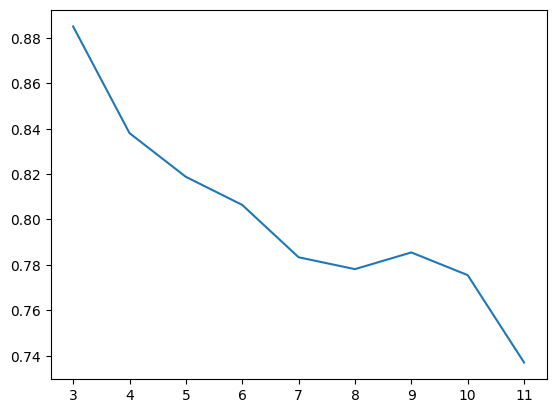

In [ ]:
import skfuzzy 
scores=[]
nclusters=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n in nclusters:
  image=img_masked
  #original_image=image
  original_image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  cntr, u, u0, d, jm, p, fpc=skfuzzy.cluster.cmeans(original_image,n,1.2,0.005,100)
  scores.append(fpc)   

plt.plot(nclusters,scores)                                                                                                                                     

In [ ]:
type(np.array([2,3]))

numpy.ndarray

In [ ]:
a=np.array([2])
a.dtype

dtype('int64')

PFCM

In [ ]:
# import numpy as np
# from numba import vectorize
import cupy as np

def pfcm(data, c, expo=2, max_iter=200, min_impro=0.05, a=1, b=4, nc=1.5):

    
    obj_fcn = np.zeros(shape=(max_iter, 1))
    ni = np.zeros(shape=(c, data.shape[0]))
    U = initf(c, data.shape[0])
    T = initf(c, data.shape[0])
    cntr = np.random.uniform(low=np.min(data), high=np.max(data), size=(c, data.shape[1]))
    
    for i in range(max_iter):
        current_cntr = cntr
        U, T, cntr, obj_fcn[i], ni = pstepfcm(data, cntr, U, T, expo, a, b, nc, ni)
        if i > 1:
            if abs(obj_fcn[i] - obj_fcn[i-1]) < min_impro:
                break
            elif np.max(abs(cntr - current_cntr)) < min_impro:
                break
    return cntr, U, T, obj_fcn


def pstepfcm(data, cntr, U, T, expo, a, b, nc, ni):
    mf = np.power(U, expo)
    tf = np.power(T, nc)
    tfo = np.power((1 - T), nc)
    cntr = (np.dot(a * mf + b * tf, data).T / np.sum(a * mf + b * tf, axis=1).T).T
    dist = pdistfcm(cntr, data)
    obj_fcn = np.sum(np.sum(np.power(dist, 2) * (a * mf + b * tf), axis=0)) + np.sum(ni * np.sum(tfo, axis=0))
    ni = mf * np.power(dist, 2) / (np.sum(mf, axis=0))
    tmp = np.power(dist, (-2/(expo - 1)))
    U = tmp/(np.sum(tmp, axis=0))
    tmpt = np.power((b / ni) * np.power(dist, 2), (1 / (nc - 1)))
    T = 1 / (1 + tmpt)
    return U, T, cntr, obj_fcn, ni


def initf(c, data_n):
    A = np.random.random(size=(c, data_n))
    col_sum = np.sum(A, axis=0)
    return A/col_sum


def pdistfcm(cntr, data):
    out = np.zeros(shape=(cntr.shape[0], data.shape[0]))
    for k in range(cntr.shape[0]):
        out[k] = np.sqrt(np.sum((np.power(data-cntr[k], 2)).T, axis=0)) + 1e-10 # Add a small epsilon to avoid division by 0
    return out


def pfcm_predict(data, cntr, expo=2, a=1, b=4, nc=2):


    dist = pdistfcm(cntr, data)
    tmp = np.power(dist, (-2 / (expo - 1)))
    U = tmp / (np.sum(tmp, axis=0))
    mf = np.power(U, expo)
    ni = mf*np.power(dist, 2) / (np.sum(mf, axis=0))
    tmpt = np.power((b / ni) * np.power(dist, 2), (1 / (nc - 1)))
    T = 1 / (1 + tmpt)
    tf = np.power(T, nc)
    tfo = np.power((1 - T), nc)
    new_cntr = (np.dot(a * mf + b * tf, data).T / np.sum(a * mf + b * tf, axis=1).T).T
    obj_fcn = np.sum(np.sum(np.power(dist, 2) * (a * mf + b * tf), axis=0)) + np.sum(ni * np.sum(tfo, axis=0))
    
    return new_cntr, U, T, obj_fcn



ModuleNotFoundError: ignored

In [ ]:
# @vectorize(['float32[:](float32[:],float32[:])'],target='cuda')
# def mydot(a,b):
#   return np.dot(a,b)

# @vectorize(['np.ndarray(np.ndarray,int64)'],target='cuda')
# def mypower(x,y):
#   return np.power(x,y)


In [ ]:
img= cv2.imread(f'{path}/{cl}')
img.reshape(img.shape[0]*img.shape[1], img.shape[2]).shape

(480000, 3)

In [ ]:
img.shape

(600, 800, 3)

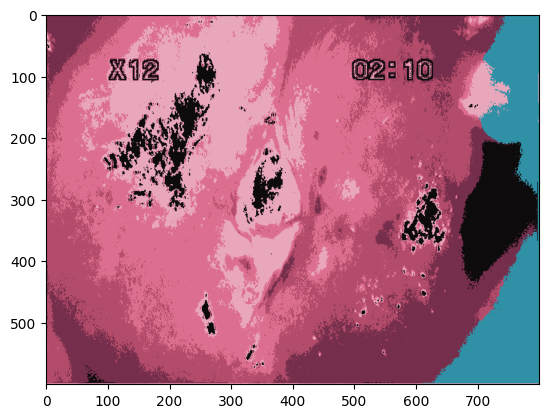

In [ ]:
# img= cv2.imread(f'{path}/{cl}')
# B,G,R=cv2.split(img)
# Y = 0.587*R + 0.299*G + 0.114*B
#img=norm_img
centers, U, T, obj_fcn=pfcm(img_masked.reshape(img_masked.shape[0]*img_masked.shape[1], img_masked.shape[2]),c=6)
labels = np.argmax(U, axis=0).reshape(img_masked.shape[0], img_masked.shape[1]) # assing each pixel to its closest cluster
img = np.zeros(shape=(labels.shape[0], labels.shape[1], 3))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i, j] = centers[labels[i, j]]
if(img.max() > 1):
    img /= 255
plt.imshow(img)

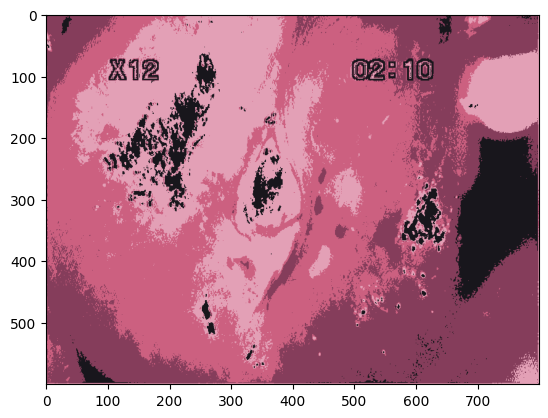

In [ ]:

nclusters=[4]
scores=[]
for n in nclusters:
  centers, U, T, obj_fcn=pfcm(img_masked.reshape(img_masked.shape[0]*img_masked.shape[1], img_masked.shape[2]),c=n)
  labels = np.argmax(U, axis=0).reshape(img_masked.shape[0], img_masked.shape[1]) # assing each pixel to its closest cluster
  img = np.zeros(shape=(labels.shape[0], labels.shape[1], 3))
  n1 = U.shape[1]
  fpc=np.trace(np.dot(U,U.T)) / float(n1)
  scores.append(fpc)
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          img[i, j] = centers[labels[i, j]]
  if(img.max() > 1):
      img /= 255
  plt.imshow(img)

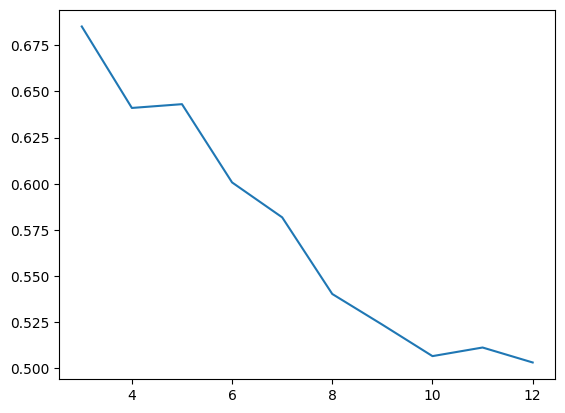

In [ ]:
plt.plot(nclusters,scores)

In [ ]:
U.shape

(8, 480000)

In [ ]:
U**

In [ ]:
obj_fcn[-1]

array([0.])

In [ ]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
cluster_membership = np.argmax(U, axis=0)
# for j in range(ncenters):
#     ax.plot(xpts[cluster_membership == j],
#             ypts[cluster_membership == j], '.', color=colors[j])

#     # Mark the center of each fuzzy cluster
# for pt in cntr:
#     ax.plot(pt[0], pt[1], 'rs')

# ax.set_title('Centers = {0}'.format(ncenters))
# ax.axis('off')'
ax.plot(xpts[cluster_membership == j],
        ypts[cluster_membership == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in centers:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers')
ax.axis('off')

NameError: ignored

In [ ]:
obj_fcn

In [ ]:
img= cv2.imread(f'{path}/{cl}')
im1=img.reshape(img.shape[0]*img.shape[1], img.shape[2])

im2=cv2.imread(f'{path}/{cl}', cv2.IMREAD_GRAYSCALE)
print(im1.shape,im2.shape)

(480000, 3) (600, 800)


In [ ]:
def decrease_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [ ]:
img.shape

(600, 800, 3)

In [ ]:
# img= cv2.imread(f'{path}/{cl}')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
value=15
lim = 255 - value
v[v > lim] = 255
v[v <= lim] -= value

final_hsv = cv2.merge((h, s, v))
#img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(img)

error: ignored

In [ ]:
#find optimal no of clusters
#Fuzzy clustering
#Luminance with various hyper parameters

In [ ]:
def init_mem_mat(nb_pixels, nb_clusters):
    mem_mat = np.zeros((nb_pixels, nb_clusters))
    x = np.arange(nb_pixels)
    for j in range(nb_clusters):
        xj = x % nb_clusters == j
        mem_mat[xj, j] = 1

    return mem_mat

def compute_centers(img_mat, mem_mat, fuzzy):
    num = np.dot(img_mat, mem_mat ** fuzzy)
    dem = np.sum(mem_mat ** fuzzy, axis=0)

    return num / dem

def update_mem_mat(ctr_mat, img_mat, fuzzy):
    ctr_mat_mesh, img_mat_mesh = np.meshgrid(ctr_mat, img_mat)
    power = 2. / (fuzzy - 1)
    p1 = abs(img_mat_mesh - ctr_mat_mesh) ** power
    p2 = np.sum((1. / abs(img_mat_mesh - ctr_mat_mesh)) ** power, axis=1)

    return 1. / (p1 * p2[:, None])


In [ ]:
!unzip CIN.zip

In [ ]:
count=0
cl='Atlas_36.2.jpg'
path='CIN'
image = plt.imread(f'{path}/{cl}')
B,G,R=cv2.split(image)
Y = 0.700*R + 0.186*G + 0.114*B
res=255-Y
# plt.imshow(res)

#img = plt.imread(f'{path}/{cl}',0)
gray = res
K = 5
N = gray.size
m = 1.5
eps = 0.3
max_i = 10
X = gray.flatten().astype('float')
U = init_mem_mat(N, K)
i = 0
while True:
  C = compute_centers(X, U, m)
  old_U = np.copy(U)
  U = update_mem_mat(C, X, m)
  d = np.sum(abs(U - old_U))
  if d < eps or i > max_i:
      break
  i += 1

n = (U.T).shape[1]

# FPC=np.trace(U.dot(U.T)) / float(n)

# seg = np.argmax(U, axis=1)
# seg = seg.reshape(gray.shape).astype('int')
# plt.imshow(seg) 


centers: [[ 27.79262744  25.31204696  33.27717171]
 [169.86295497  91.39478281 127.13407733]
 [ 99.56774819  35.21779278  63.70492781]
 [133.34395388  55.48199712  89.0074501 ]
 [211.51396315  85.59225276 118.78512491]
 [ 43.39672897 124.44057555 155.49458073]
 [ 93.01776641 226.72753558 232.78945278]
 [233.41545119 139.8397542  169.02716208]
 [175.11674389  59.37719882  89.04782448]
 [225.82478459 110.69612848 145.11602801]
 [237.85077286 173.83721044 195.47355802]
 [248.03518162 232.36889205 238.38494134]]


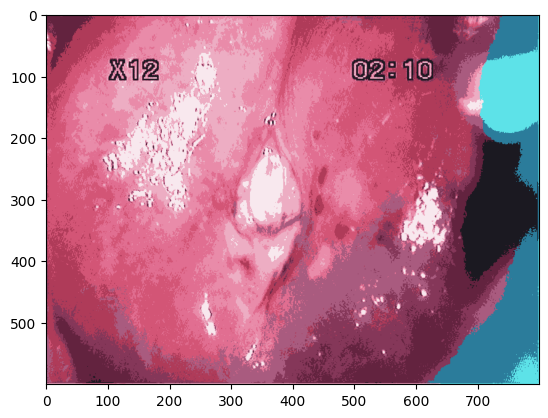

In [ ]:
import skfuzzy as fuzzy
def get_labels(cluster_membership):
  labels = []
  for pixel in cluster_membership.T:
    labels.append(np.argmax(pixel))
  return labels
cl='Atlas_36.2.jpg'
image = plt.imread(f'{path}/{cl}')
original_shape=image.shape
#image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))
cntr,u,u0,d,jm,p,fpc = fuzzy.cmeans(data=image.T,c=12,m=1.5, error=0.0001, maxiter=100, init=None, seed=None)

fcm_centers = cntr 
labels = u 
  
print("centers: " + str(fcm_centers))

colors = fcm_centers

labels = get_labels(labels)

for i in range(0,image.shape[0]):
    cluster_no = labels[i]
    image[i,:] = colors[cluster_no]

fuzzy_seg_image = image.reshape(original_shape)
plt.imshow(fuzzy_seg_image)

In [ ]:
1-(0.7+0.114)
#0.299,0.587,0.114

0.18600000000000005

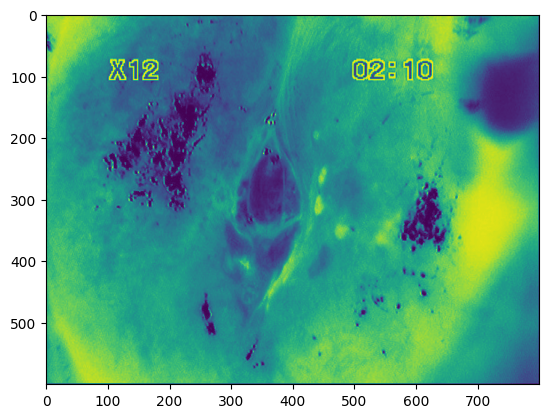

In [ ]:
import math
path='CIN'
cl='Atlas_36.2.jpg'
image = plt.imread(f'{path}/{cl}')
B,G,R=cv2.split(image)
Y = 0.2*R + 0.7*G + 0.1*B
res=255-Y
plt.imshow(res)

In [ ]:
mylist=['Atlas_39.2.jpg',
 'Atlas_4.2.jpg',
 'Atlas_27.1.jpg',
 'Atlas_20.2.jpg',
 'Atlas_21.2.jpg',
 'Atlas_44.1.jpg',
 'Atlas_23.3.jpg',
 'Atlas_15.2.jpg',
 'Atlas_19.1.jpg',
 'Atlas_39.1.jpg',
 'Atlas_41.1.jpg',
 'Atlas_3.1.jpg',
 'Atlas_40.3.jpg',
 'Atlas_22.2.jpg',
 'Atlas_12.1.jpg',
 'Atlas_9.1.jpg',
 'Atlas_34.1.jpg',
 'Atlas_35.1.jpg',
 'Atlas_14.1.jpg',
 'Atlas_15.1.jpg',
 'Atlas_14.2.jpg',
 'Atlas_28.1.jpg',
 'Atlas_36.1.jpg',
 'Atlas_37.2.jpg',
 'Atlas_40.2.jpg',
 'Atlas_18.1.jpg',
 'Atlas_38.1.jpg',
 'Atlas_11.1.jpg',
 'Atlas_20.1.jpg',
 'Atlas_31.1.jpg',
 'Atlas_8.1.jpg',
 'Atlas_41.2.jpg',
 'Atlas_44.2.jpg',
 'Atlas_7.2.jpg',
 'Atlas_38.2.jpg',
 'Atlas_2.1.jpg',
 'Atlas_29.1.jpg',
 'Atlas_23.2.jpg',
 'Atlas_42.2.jpg',
 'Atlas_23.1.jpg',
 'Atlas_7.1.jpg',
 'Atlas_21.3.jpg',
 'Atlas_45.2.jpg',
 'Atlas_1.2.jpg',
 'Atlas_22.3.jpg',
 'Atlas_18.2.jpg',
 'Atlas_36.2.jpg',
 'Atlas_37.1.jpg',
 'Atlas_22.1.jpg',
 'Atlas_45.1.jpg',
 'Atlas_1.3.jpg',
 'Atlas_32.1.jpg',
 'Atlas_24.1.jpg',
 'Atlas_8.2.jpg',
 'Atlas_9.2.jpg',
 'Atlas_16.1.jpg',
 'Atlas_5.1.jpg',
 'Atlas_31.2.jpg',
 'Atlas_30.1.jpg',
 'Atlas_19.2.jpg',
 'Atlas_41.3.jpg',
 'Atlas_16.2.jpg',
 'Atlas_40.1.jpg',
 'Atlas_42.1.jpg',
 'Atlas_6.1.jpg',
 'Atlas_4.1.jpg',
 'Atlas_25.1.jpg',
 'Atlas_14.3.jpg',
 'Atlas_4.4.jpg',
 'Atlas_10.1.jpg',
 'Atlas_21.1.jpg',
 'Atlas_1.1.jpg',
 'Atlas_26.1.jpg',
 'Atlas_13.1.jpg',
 'Atlas_4.3.jpg',
 'Atlas_38.3.jpg',
 'Atlas_13.2.jpg',
 'Atlas_5.2.jpg',
 'Atlas_17.1.jpg',
 'Atlas_30.2.jpg',
 'Atlas_11.2.jpg',
 'Atlas_33.1.jpg']
mylist[32]

'Atlas_44.2.jpg'

In [ ]:
!unzip CIN.zip
#!unzip Normal.zip

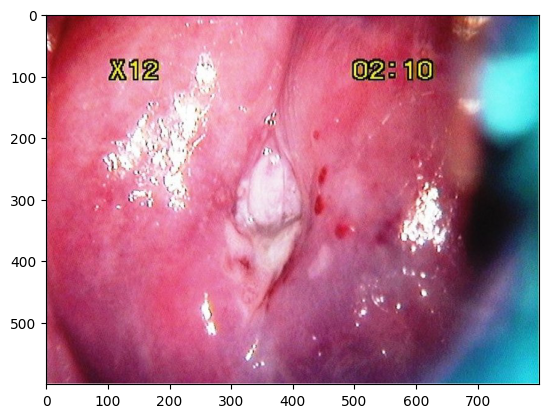

In [ ]:
path='CIN'
mylist = os.listdir(path)

cl='Atlas_36.2.jpg'#mylist[1]
img = plt.imread(f'{path}/{cl}',0)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 25)


plt.imshow(img)    

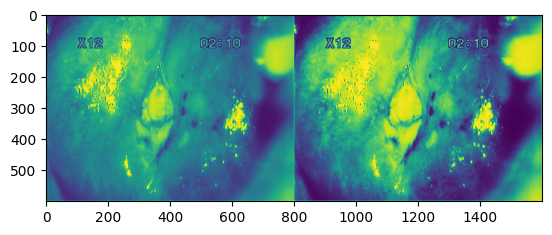

In [ ]:
# def brightness_contrast(image, brightness = 0, contrast = 0):
#     alpha = float(131 * (contrast + 127)) / (127 * (131 - contrast))
#     gamma = float(255 * (brightness + 127 - alpha * 127)) / 255

#     new_image = cv2.addWeighted(image, alpha, image, 0, gamma)
#     return new_image
# new_image = brightness_contrast(img, brightness = -500, contrast = 50)

# hh, ww = img.shape[:2]

# # threshold
# lower = (150,150,150)
# upper = (220,220,220)
# thresh = cv2.inRange(img, lower, upper)

# # apply morphology close and open to make mask
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
# morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25,25))
# morph = cv2.morphologyEx(morph, cv2.MORPH_DILATE, kernel, iterations=1)

# # floodfill the outside with black
# black = np.zeros([hh + 2, ww + 2], np.uint8)
# mask = morph.copy()
# mask = cv2.floodFill(mask, black, (0,0), 0, 0, 0, flags=8)[1]

# # use mask with input to do inpainting
# result1 = cv2.inpaint(img, mask, 101, cv2.INPAINT_TELEA)
# result2 = cv2.inpaint(img, mask, 101, cv2.INPAINT_NS)
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(grayimg)
res = np.hstack((grayimg, equ))
plt.imshow(res) 

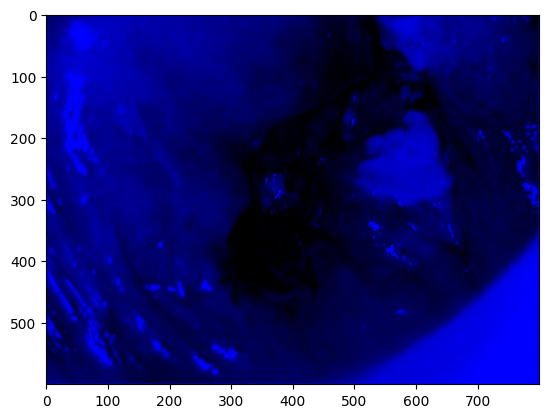

In [ ]:
#r,g,b=cv2.split(img)

r = img.copy()
r[:,:,0] = r[:,:,1] = 0

g = img.copy()
g[:,:,0] = g[:,:,2] = 0

b = img.copy()
b[:,:,1] = b[:,:,2] = 0


plt.imshow(r)  

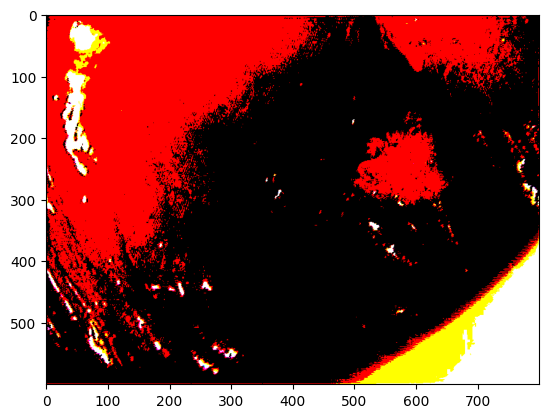

In [ ]:
#saturated = Binarize[ColorConvert[img, "Grayscale"], .9]
thresh = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)  
#Inpaint[img, Dilation[saturated, DiskMatrix[20]]]

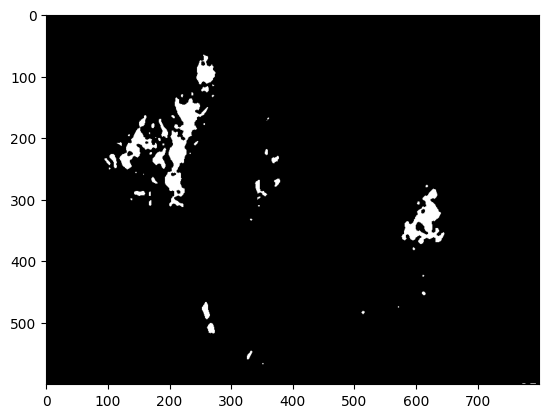

In [ ]:

gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 235, 255, cv2.THRESH_BINARY)
median = cv2.medianBlur(thresh, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(median, cv2.MORPH_CLOSE, kernel)

# Convert the binary image back to a color image
result = cv2.cvtColor(closed, cv2.COLOR_GRAY2BGR)
#result=255-result
plt.imshow(result)  

In [ ]:
img.shape

(600, 800, 3)

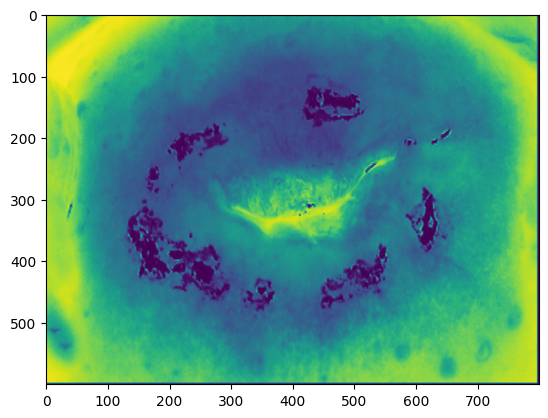

In [ ]:
cl=mylist[36]
img = plt.imread(f'{path}/{cl}',0)
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

# Split the image into its Y, Cr, and Cb channels
Y, Cr, Cb = cv2.split(img_ycrcb)
inverted_luminance = abs(255 - Y)

plt.imshow(inverted_luminance)  

In [ ]:
cl=mylist[1]
#img = inverted_luminance#masked#plt.imread(f'{path}/{cl}')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(600, 800, 3)

In [ ]:
path1='segmented'
from IPython.display import display
from PIL import Image as im
i=1
for cl in mylist:
  img = plt.imread(f'{path}/{cl}')
  img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
  Y, Cr, Cb = cv2.split(img_ycrcb)
  inverted_luminance = abs(255 - Y)
  #vectorized_img = img.reshape((-1,3))
  vectorized_img = inverted_luminance.reshape((-1,3))
  vectorized_img= np.float32(vectorized_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  K = 4
  attempts=10
  ret,label,center=cv2.kmeans(vectorized_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  pic=im.fromarray(result_image)
  pic.save(f'{path1}/{cl}')
  # plt.figure(figsize=(15,10))
  # plt.imshow(img)
  # plt.imshow(result_image)
  print('...image '+str(i)+'...')
  i=i+1
  display(im.fromarray(img), pic)


In [ ]:
path1='segmented'
path='Normal'
from IPython.display import display
from PIL import Image as im
i=1
mylist = os.listdir(path)
for cl in mylist:
  img = plt.imread(f'{path}/{cl}')
  img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
  Y, Cr, Cb = cv2.split(img_ycrcb)
  inverted_luminance = abs(255 - Y)
  vectorized_img = img.reshape((-1,3))
  #vectorized_img = inverted_luminance.reshape((-1,3))
  vectorized_img= np.float32(vectorized_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  K = 4
  attempts=10
  ret,label,center=cv2.kmeans(vectorized_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  pic=im.fromarray(result_image)
  #pic.save(f'{path1}/{cl}')
  # plt.figure(figsize=(15,10))
  # plt.imshow(img)
  # plt.imshow(result_image)
  print('...image '+str(i)+'...')
  i=i+1
  display(im.fromarray(img), pic)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
vectorized_img = img.reshape((-1,3))
vectorized_img.shape

(480000, 3)

In [ ]:
vectorized_img= np.float32(vectorized_img)
vectorized_img

array([[172., 172., 172.],
       [124., 124., 124.],
       [112., 112., 112.],
       ...,
       [182., 170., 180.],
       [199., 189., 197.],
       [220., 210., 218.]], dtype=float32)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)


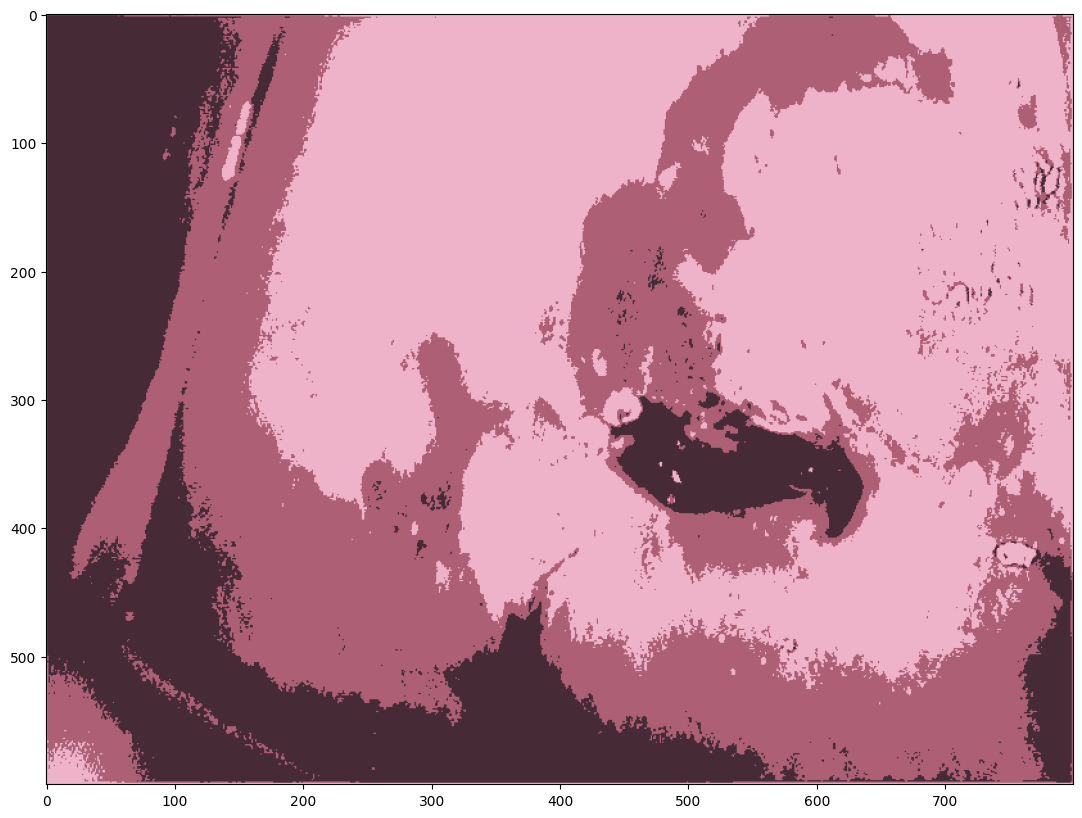

In [ ]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))
plt.figure(figsize=(15,10))
plt.imshow(result_image)